# **TASK 04: Predicting House Prices with Linear Regression**

Name: Muskan Giri

Domain: Data Analytics

Oasis Infobyte Virtual Internship

#### Importing necessary libraries

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn. model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

#### Data Collection

In [11]:
#Load the housing dataset
housing_data=pd.read_csv("Housing.csv")

In [13]:
##check the head of dataset
housing_data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [14]:
##check the bottom of dataset
housing_data.tail(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished
536,1960000,3420,5,1,2,no,no,no,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
538,1890000,3649,2,1,1,yes,no,no,no,no,0,no,unfurnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


#### Data Exploration

In [15]:
#shape of the our dataset
print("The shape of our dataset: ",housing_data.shape)

The shape of our dataset:  (545, 13)


In [16]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


This dataset contains 6 numerical columns and 7 categorical columns.

Now, lets explore the categorical columns and numerical columns.

In [18]:
#categorical columns
categorical_columns=[]
for column in housing_data.columns:
    if (housing_data[column].dtype=='object'):
        categorical_columns.append(column)
print("Categorical columns: ", categorical_columns)

Categorical columns:  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [19]:
#numerical columns
numerical_columns=[]
for column in housing_data.columns:
    if (housing_data[column].dtype!='object'):
        numerical_columns.append(column)
print("Numerical columns: ", numerical_columns)

Numerical columns:  ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [20]:
#Descriptive Statistics
print("Calculate basic Descriptive Statistics:")
housing_data.describe()

Calculate basic Descriptive Statistics:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#### Data Cleaning

In [25]:
#missing values
housing_data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

There are No missing values in this datasets

In [22]:
#duplicated values
print("Duplicated Value: ",housing_data.duplicated().sum())

Duplicated Value:  0


In [26]:
#exploring the unique values of each column  
print("Unique values of each column: ")
housing_data.nunique()

Unique values of each column: 


price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

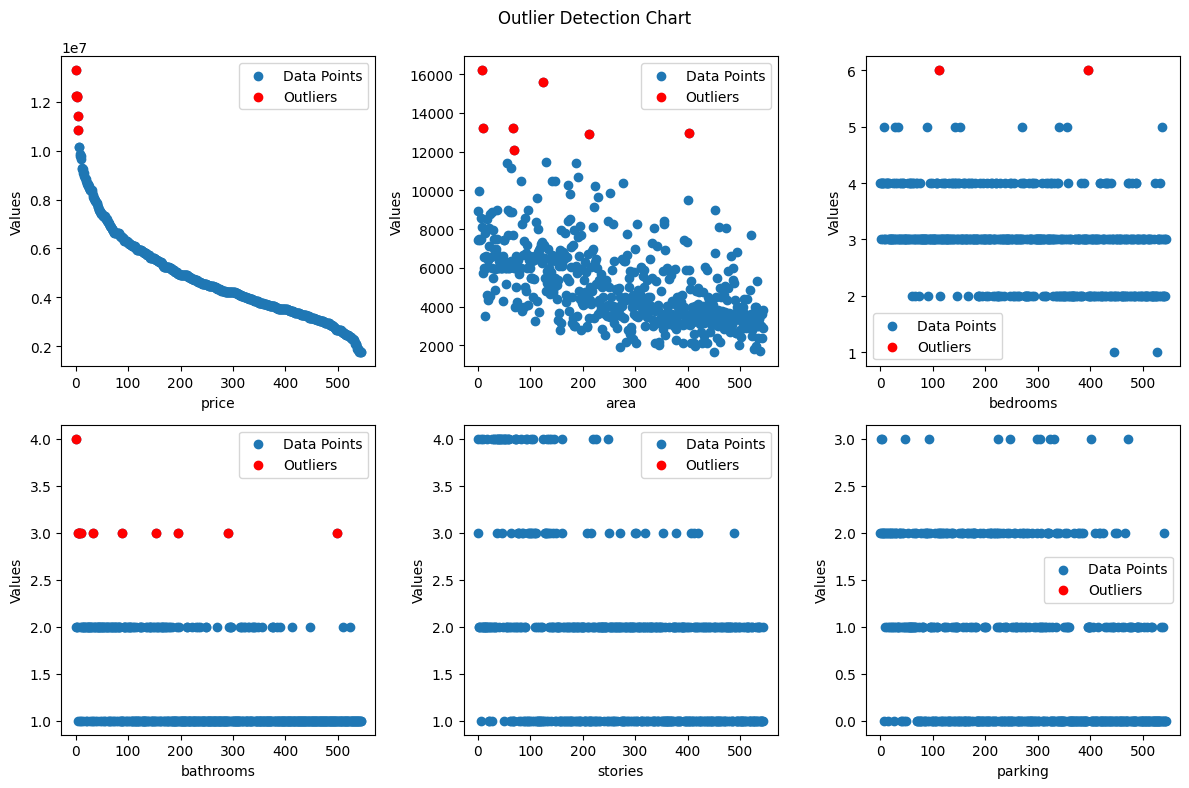

In [28]:
#Outlier detection
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for i, column in enumerate(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']):
    axs.flatten()[i].scatter(housing_data.index, housing_data[column], label='Data Points')
    z_scores = stats.zscore(housing_data[column])
    outliers = (abs(z_scores) > 3)
    axs.flatten()[i].scatter(housing_data.index[outliers], housing_data[column][outliers], color='red', label='Outliers')
    axs.flatten()[i].set_xlabel(column)
    axs.flatten()[i].set_ylabel('Values')
    axs.flatten()[i].legend()
plt.suptitle('Outlier Detection Chart')
plt.tight_layout()
plt.show()

In that charts, It is clearly seen that the price, area and bathrooms columns contains highest number of outliers. So we'll exclude them.

In [42]:
#removing outlier
z_scr = zscore(housing_data[['price', 'area']])
threshold = 3
outlier_mask = (abs(z_scr) > threshold).any(axis=1)
new_housing_data = housing_data[~outlier_mask]
new_housing_data
print("Total outlier mask:",outlier_mask.sum())

Total outlier mask: 13


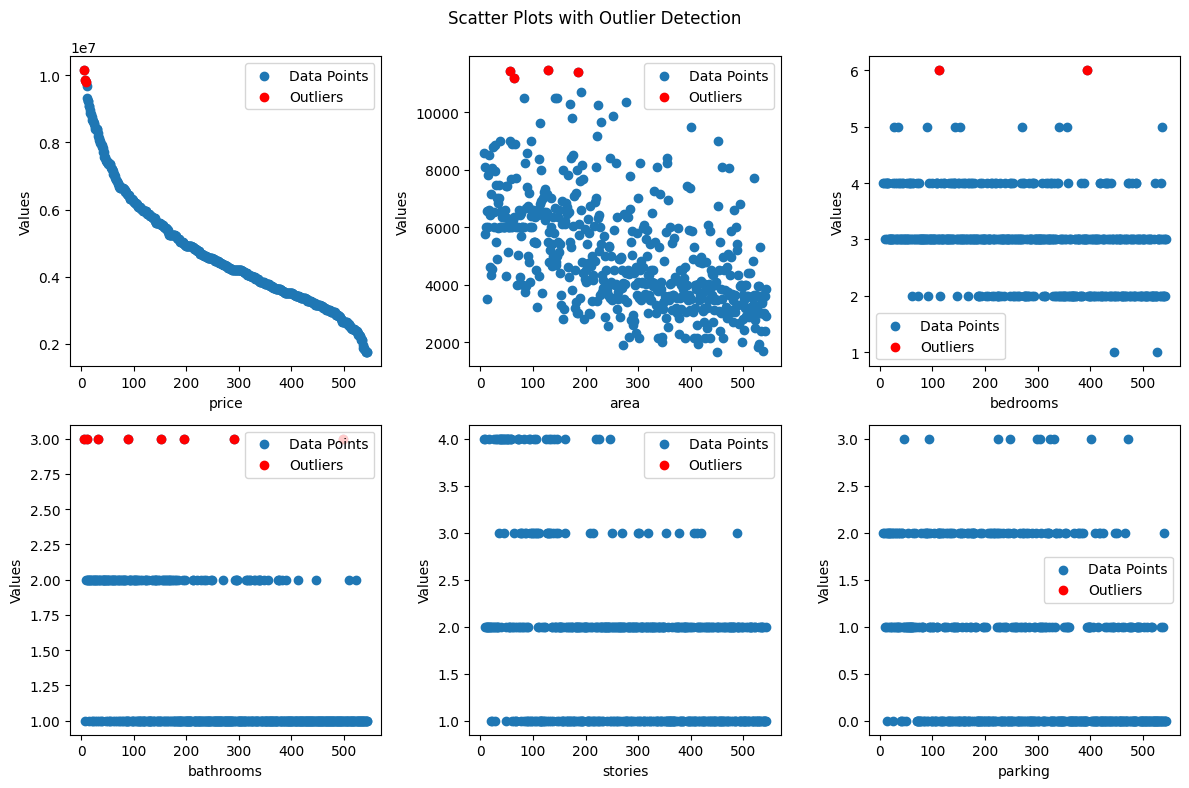

In [43]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for i, column in enumerate(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']):
    axs.flatten()[i].scatter(new_housing_data.index, new_housing_data[column], label='Data Points')
    z_scores = stats.zscore(new_housing_data[column])
    outliers = (abs(z_scores) > 3)
    axs.flatten()[i].scatter(new_housing_data.index[outliers], new_housing_data[column][outliers], color='red', label='Outliers')
    axs.flatten()[i].set_xlabel(column)
    axs.flatten()[i].set_ylabel('Values')
    axs.flatten()[i].legend()
plt.suptitle('Scatter Plots with Outlier Detection')
plt.tight_layout()
plt.show()

Now we can see that the outliers have been removed.

In [31]:
print("The Old shape of our dataset: ",housing_data.shape)

The Old shape of our dataset:  (545, 13)


In [44]:
print("The New shape of our dataset: ",new_housing_data.shape)

The New shape of our dataset:  (532, 13)


***1.Exploratory Data Analysis***

# Distribution of Price
plt.figure(figsize=(8, 6))
ax=sns.histplot(new_housing_data['price'], kde=False,color='royalblue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), 
                        textcoords='offset points')
plt.title('Distribution of Price')
plt.show()

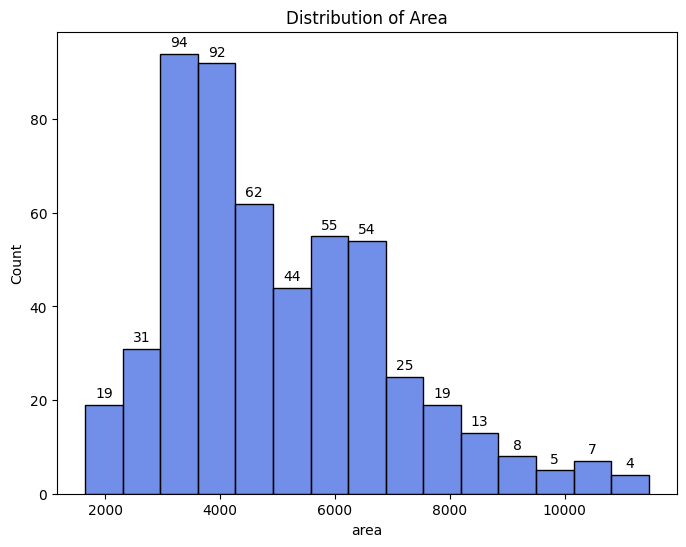

In [47]:
# Distribution of Area
plt.figure(figsize=(8, 6))
ax=sns.histplot(new_housing_data['area'], kde=False,color='royalblue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), 
                textcoords='offset points')
plt.title('Distribution of Area')
plt.show()

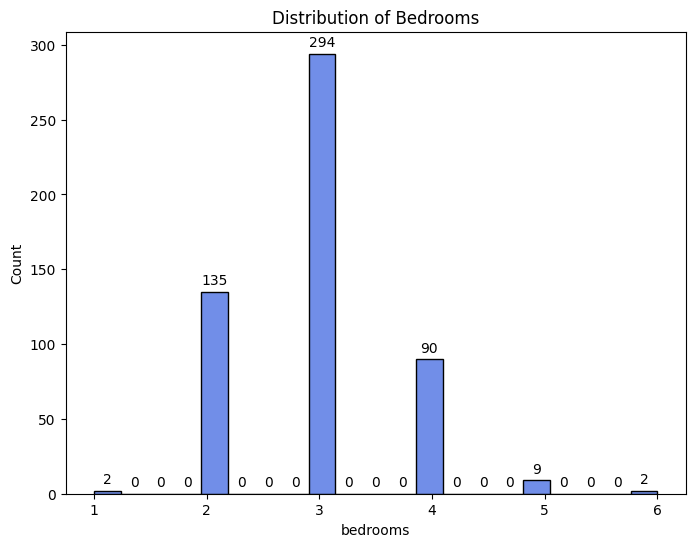

In [46]:
# Distribution of Bedrooms
plt.figure(figsize=(8, 6))
ax=sns.histplot(new_housing_data['bedrooms'], kde=False,color='royalblue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), 
                textcoords='offset points')
plt.title('Distribution of Bedrooms')
plt.show()

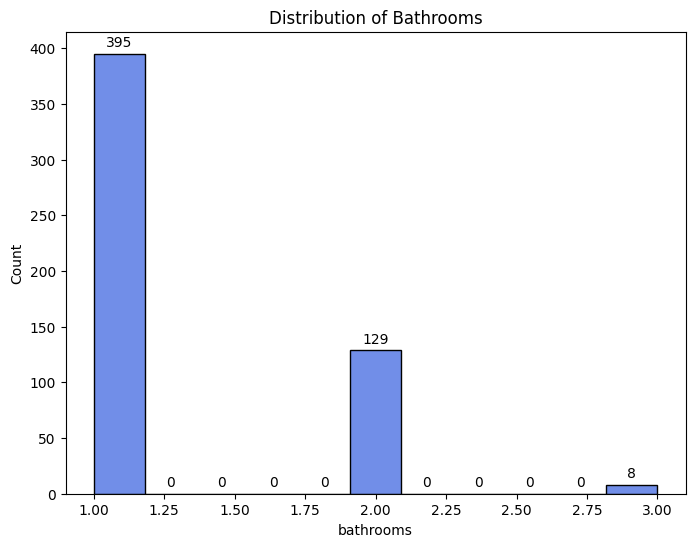

In [48]:
# Distribution of Bathrooms
plt.figure(figsize=(8, 6))
ax=sns.histplot(new_housing_data['bathrooms'], kde=False,color='royalblue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), 
                textcoords='offset points')
plt.title('Distribution of Bathrooms')
plt.show()

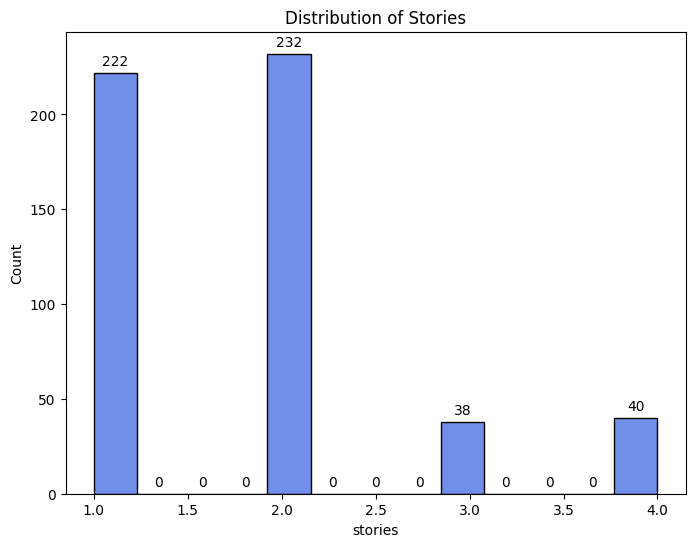

In [49]:
# Distribution of Stories
plt.figure(figsize=(8, 6))
ax=sns.histplot(new_housing_data['stories'], kde=False,color='royalblue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), 
                textcoords='offset points')
plt.title('Distribution of Stories')
plt.show()

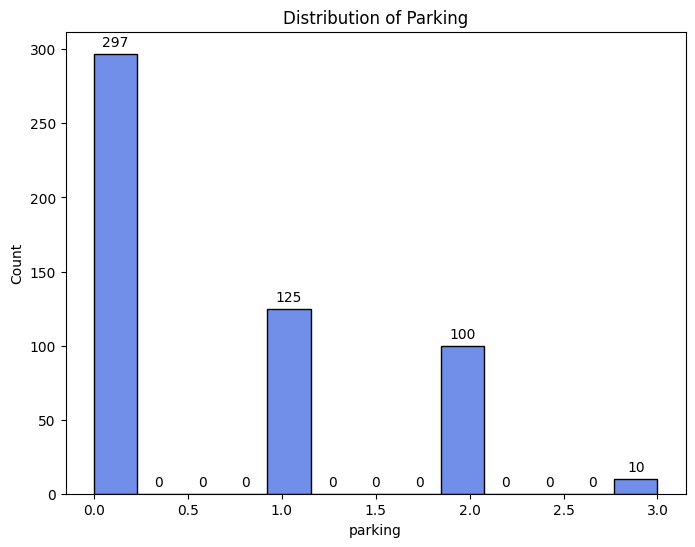

In [50]:
# Distribution of Parking
plt.figure(figsize=(8, 6))
ax=sns.histplot(new_housing_data['parking'], kde=False,color='royalblue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), 
                textcoords='offset points')
plt.title('Distribution of Parking')
plt.show()

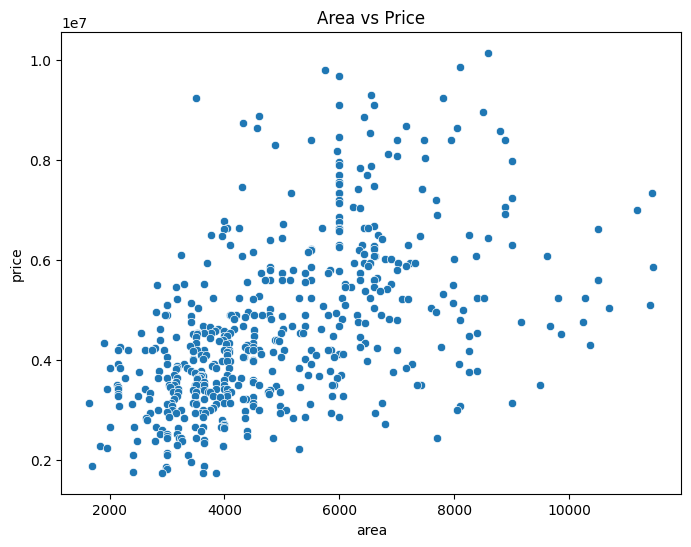

In [51]:
# Area vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='price', data=new_housing_data)
plt.title('Area vs Price')
plt.show()

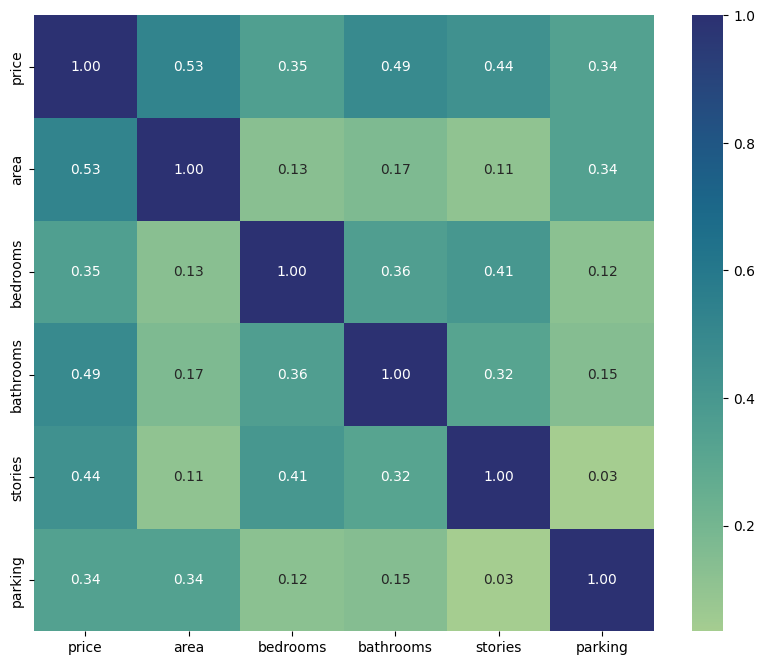

In [58]:
# Filter the DataFrame to keep only numeric columns
numeric_columns = new_housing_data.select_dtypes(include=['int64', 'float64']).columns
new_housing_data_numeric = new_housing_data[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = new_housing_data_numeric.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.show()

This heatmap shows that area is highly correlated with price.

***2.Data Preprocessing***

In [59]:
# Encoding the categorical variables using replace
encode_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
new_hhousing_data[encode_columns] = new_hhousing_data[encode_columns].replace({'yes': 1, 'no': 0})
new_hhousing_data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished
11,9681000,6000,4,3,2,1,1,1,1,0,2,0,semi-furnished
12,9310000,6550,4,2,2,1,0,0,0,1,1,1,semi-furnished


In [60]:
#Encoding the furnishingstatus column which contain 3 levels using get_dummies
furnish_sts = pd.get_dummies(new_hhousing_data['furnishingstatus'])
furnish_sts.head(5)

,furnished,semi-furnished,unfurnished
6,False,True,False
8,True,False,False
9,False,False,True
11,False,True,False
12,False,True,False


In [61]:
#Dropping the furnishingstatus column and combining the furnish_sts column instead
new_house_data = new_hhousing_data.drop(['furnishingstatus'],axis = 1)
new_house_data = pd.concat([new_house_data,furnish_sts],axis = 1)
new_house_data.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,False,True,False
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,True,False,False
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,False,False,True


***3.Scaling***

In [63]:
scaler = MinMaxScaler()
features_to_scale = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
new_house_data[features_to_scale] = scaler.fit_transform(new_house_data[features_to_scale])
new_hhousing_data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished
11,9681000,6000,4,3,2,1,1,1,1,0,2,0,semi-furnished
12,9310000,6550,4,2,2,1,0,0,0,1,1,1,semi-furnished


#### Feature Selection

In [64]:
# Creating features (X) and target (y)
X = np.array(new_house_data.drop('price', axis=1))
y = np.array(new_house_data['price']).reshape(-1, 1)

print("Shape of features X:", X.shape)
print("Shape of features y:", y.shape)

Shape of features X: (532, 14)
Shape of features y: (532, 1)


Spliting training and testing data set

Now we will create the training and testing data set

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42, shuffle=True)

we have splited data. Therefore the testing data is 25% and training data is 75%

In [68]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(399, 14)
(133, 14)
(399, 1)
(133, 1)


#### Model Training - linear regression

In [70]:
#define parametes for grid search
parameter_grid={'n_features_to_select':[3,5,7,10]}
model=LinearRegression() #initializing the model
rfe=RFE(model) 

grid=GridSearchCV(estimator=rfe,param_grid=parameter_grid,scoring='neg_mean_squared_error',cv=5)
grid.fit(X_train,y_train)

best_features=grid.best_estimator_.n_features_to_select
print(f'Number of features to select: {best_features}')

Number of features to select: 10


***Feature Selection***

In [71]:
#feature selection
rfe_model=RFE(model,n_features_to_select=10)
X_train_rfe=rfe_model.fit_transform(X_train,y_train)
X_test_rfe=rfe_model.transform(X_test)
#Fitting the model
lm = model.fit(X_train_rfe,y_train)
y_pred = lm.predict(X_test_rfe)

In [72]:
y_test

array([[0.89166667],
       [0.10833333],
       [0.50833333],
       [0.10833333],
       [0.15833333],
       [0.34166667],
       [0.3325    ],
       [0.16666667],
       [0.23333333],
       [0.57916667],
       [0.13333333],
       [0.29583333],
       [0.575     ],
       [0.16666667],
       [0.58083333],
       [0.325     ],
       [0.3375    ],
       [0.85      ],
       [0.23333333],
       [0.225     ],
       [0.29166667],
       [0.95833333],
       [0.27916667],
       [0.54166667],
       [0.22916667],
       [0.16666667],
       [0.53333333],
       [0.25833333],
       [0.06666667],
       [0.1625    ],
       [0.18333333],
       [0.425     ],
       [0.38333333],
       [0.39583333],
       [0.56666667],
       [0.20833333],
       [0.12916667],
       [0.38333333],
       [0.73958333],
       [0.5625    ],
       [0.41416667],
       [0.62916667],
       [0.85833333],
       [0.54166667],
       [0.4       ],
       [0.09166667],
       [0.27916667],
       [0.458

In [73]:
y_pred

array([[0.50747697],
       [0.07373778],
       [0.34708648],
       [0.37779019],
       [0.34052771],
       [0.43171503],
       [0.49958008],
       [0.29515014],
       [0.18382443],
       [0.72051451],
       [0.21852682],
       [0.25462892],
       [0.58275355],
       [0.24199783],
       [0.49093229],
       [0.30804879],
       [0.29524718],
       [0.48693017],
       [0.23826167],
       [0.31144698],
       [0.25162595],
       [0.65283649],
       [0.32193218],
       [0.47035858],
       [0.20529063],
       [0.26606783],
       [0.57716942],
       [0.19105305],
       [0.13027585],
       [0.14029014],
       [0.19430329],
       [0.547716  ],
       [0.57700892],
       [0.4072915 ],
       [0.4707487 ],
       [0.20021235],
       [0.16956129],
       [0.4794194 ],
       [0.51574652],
       [0.53551108],
       [0.43172515],
       [0.66502977],
       [0.70358196],
       [0.52954321],
       [0.36158399],
       [0.17194409],
       [0.22578642],
       [0.400

#### Model Evaluation

In [75]:
mean_squar_err=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mean_squar_err)
R2Score=r2_score(y_test,y_pred)
print("R2 Score:",R2Score)

Mean Squared Error: 0.01368172249537116
R2 Score: 0.7201739613624065


#### Insights:

- Our model is doing really well. The low MSE (0.0136) means that it's making very accurate predictions, Almost all values are correctly predicted.
- The R-Squared value is 0.7201739613624065, indicates that our model explains 72% of the changes in the target variable.

#### Visualization

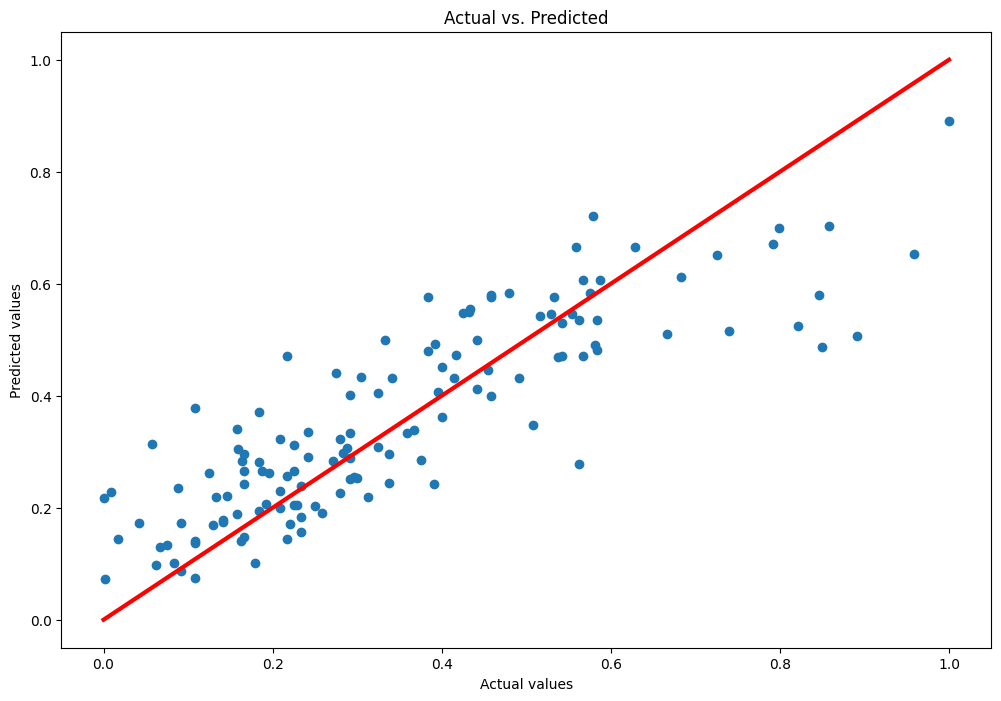

In [76]:
#Create visualizations to illustrate the relationship between the predicted and actual values.
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],linewidth = 3,color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted')
plt.show()